## Topic Clusters

We use the GSDMM model to group the Q&A into different clusters (topics).

In [1]:
import pandas as pd 
import numpy as np
from gsdmm.mgp import MovieGroupProcess


dir = 'solar_panel_keywords.csv'
df = pd.read_csv( f'{dir}', encoding='utf8')
df.head()

,Unnamed: 0,id,Question,Answer,Topic,Keywords
0,0,1,What is the main purpose of this paper?,The main purpose of this paper is to present a...,main purpose,"main, purpose, Rests, paper, energy, systems, ..."
1,1,2,What are the keywords associated with this paper?,The keywords associated with this paper are Re...,Solar system,"keywords, paper, Solar, Residential, Urban, Re..."
2,2,3,What is GIVES?,GIVES stands for the integrated value model fo...,sustainability assessment,"assessment, stands, integrated, model, sustain..."
3,3,4,What is the advantage of PV/T over PV?,PV/T is a better solution when stakeholders ar...,decrement potential,"advantage, potential, solution, stakeholders, ..."
4,4,7,What are the measures necessary to reduce ener...,Reducing energy needs with measures such as le...,reduce energy,"energy, measures, reduce, consuming, devices, ..."


In [2]:
texts = df['Keywords']
texts = [text.split() for text in texts]

mgp = MovieGroupProcess(K=30, n_iters=50, alpha=0.5, beta=0.1)
y = mgp.fit(texts, 20)

In stage 0: transferred 2340 clusters with 30 clusters populated
In stage 1: transferred 1230 clusters with 30 clusters populated
In stage 2: transferred 837 clusters with 30 clusters populated
In stage 3: transferred 718 clusters with 30 clusters populated
In stage 4: transferred 619 clusters with 30 clusters populated
In stage 5: transferred 496 clusters with 30 clusters populated
In stage 6: transferred 485 clusters with 30 clusters populated
In stage 7: transferred 486 clusters with 30 clusters populated
In stage 8: transferred 441 clusters with 30 clusters populated
In stage 9: transferred 427 clusters with 30 clusters populated
In stage 10: transferred 355 clusters with 30 clusters populated
In stage 11: transferred 334 clusters with 30 clusters populated
In stage 12: transferred 383 clusters with 30 clusters populated
In stage 13: transferred 376 clusters with 30 clusters populated
In stage 14: transferred 403 clusters with 30 clusters populated
In stage 15: transferred 362 clus

In [9]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)

all_indices = doc_count.argsort()[:][:]

Number of documents per topic : [ 94  82 100  65 117  82 142  85  89  97 114 132  90  85 101  84 100 108
 112  96  78 105  73 102  62  70  88  76  73  85]
********************
Most important clusters (by number of docs inside): [ 6 11  4 10 18 17 21 23 14 16]
********************


In [36]:
def top_words(cluster_word_distribution, top_cluster, values):
    dict_clusters = {}
    
    for cluster in top_cluster:
        sort_dicts = sorted(
            mgp.cluster_word_distribution[cluster].items(),
            key=lambda k: k[1],
            reverse=True,
        )[:values]
        
        dict_clusters[cluster] = sort_dicts[0][0]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — — ')
    return dict_clusters    
        
# Show the top 10 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 10)        

Cluster 6 : [('households,', 48), ('Puerto,', 48), ('Guatemala,', 47), ('Rico,', 45), ('solar,', 39), ('access,', 31), ('energy,', 25), ('electricity,', 23), ('percentage,', 17), ('regions,', 15)]
 — — — — — — — — — 
Cluster 11 : [('efficiency,', 32), ('temperature,', 31), ('thermal,', 28), ('water,', 23), ('solar,', 19), ('nanofluid,', 19), ('affect,', 13), ('heat,', 13), ('compared,', 13), ('flow,', 12)]
 — — — — — — — — — 
Cluster 4 : [('heat,', 33), ('solar,', 32), ('water,', 28), ('thermal,', 21), ('study,', 21), ('energy,', 20), ('transfer,', 18), ('purpose,', 17), ('desalination,', 15), ('systems,', 13)]
 — — — — — — — — — 
Cluster 10 : [('solar,', 43), ('collectors,', 21), ('performance,', 21), ('purpose,', 20), ('type,', 20), ('thermal,', 18), ('systems,', 17), ('efficiency,', 16), ('energy,', 16), ('PVT,', 15)]
 — — — — — — — — — 
Cluster 18 : [('energy,', 56), ('renewable,', 24), ('solar,', 20), ('economic,', 20), ('emissions,', 18), ('sources,', 17), ('environmental,', 16),

{6: 'households,',
 11: 'efficiency,',
 4: 'heat,',
 10: 'solar,',
 18: 'energy,',
 17: 'energy,',
 21: 'solar,',
 23: 'energy,',
 14: 'Energy,',
 16: 'solar,'}

In [37]:
res = top_words(mgp.cluster_word_distribution, all_indices, 1)

Cluster 24 : [('type,', 9)]
 — — — — — — — — — 
Cluster 3 : [('Hurricane,', 24)]
 — — — — — — — — — 
Cluster 25 : [('data,', 13)]
 — — — — — — — — — 
Cluster 22 : [('performance,', 23)]
 — — — — — — — — — 
Cluster 28 : [('energy,', 38)]
 — — — — — — — — — 
Cluster 27 : [('loss,', 25)]
 — — — — — — — — — 
Cluster 20 : [('energy,', 16)]
 — — — — — — — — — 
Cluster 1 : [('solar,', 17)]
 — — — — — — — — — 
Cluster 5 : [('bus,', 30)]
 — — — — — — — — — 
Cluster 15 : [('SWH,', 23)]
 — — — — — — — — — 
Cluster 29 : [('social,', 30)]
 — — — — — — — — — 
Cluster 7 : [('solar,', 32)]
 — — — — — — — — — 
Cluster 13 : [('solar,', 34)]
 — — — — — — — — — 
Cluster 26 : [('water,', 34)]
 — — — — — — — — — 
Cluster 8 : [('energy,', 39)]
 — — — — — — — — — 
Cluster 12 : [('energy,', 43)]
 — — — — — — — — — 
Cluster 0 : [('solar,', 40)]
 — — — — — — — — — 
Cluster 19 : [('solar,', 26)]
 — — — — — — — — — 
Cluster 9 : [('solar,', 37)]
 — — — — — — — — — 
Cluster 2 : [('model,', 34)]
 — — — — — — — — — 
C

In [39]:
res[16]

'solar,'

In [40]:
df['Cluster'] = y

In [ ]:
df['Cluster Title']

In [7]:
df.head()

,Unnamed: 0,id,Question,Answer,Topic,Keywords,Cluster
0,0,1,What is the main purpose of this paper?,The main purpose of this paper is to present a...,main purpose,"main, purpose, Rests, paper, energy, systems, ...",20
1,1,2,What are the keywords associated with this paper?,The keywords associated with this paper are Re...,Solar system,"keywords, paper, Solar, Residential, Urban, Re...",27
2,2,3,What is GIVES?,GIVES stands for the integrated value model fo...,sustainability assessment,"assessment, stands, integrated, model, sustain...",20
3,3,4,What is the advantage of PV/T over PV?,PV/T is a better solution when stakeholders ar...,decrement potential,"advantage, potential, solution, stakeholders, ...",2
4,4,7,What are the measures necessary to reduce ener...,Reducing energy needs with measures such as le...,reduce energy,"energy, measures, reduce, consuming, devices, ...",29


In [8]:
df.to_csv('solar_panel_clusters.csv')

<AxesSubplot: >

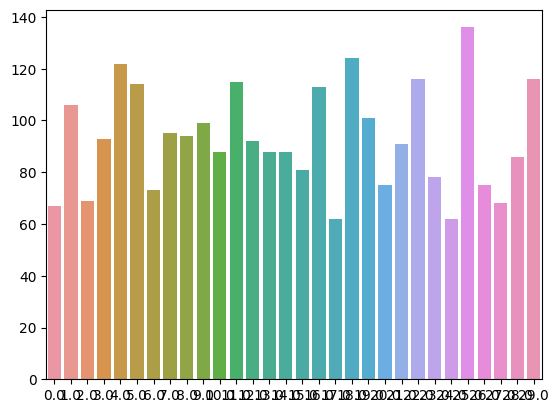

In [22]:
import seaborn as sns 

num_topics = len(doc_count)
xvector = np.linspace(0,num_topics-1,num_topics)
sns.barplot(x=xvector,y=doc_count)

In [ ]:
mgp.cluster_word_distribution

[{'main,': 5,
  'research,': 4,
  'system,': 5,
  'article,': 6,
  'water,': 6,
  'remediation,': 2,
  'removal,': 4,
  'nanocomposite,': 3,
  'toxic,': 6,
  'type,': 9,
  'purpose,': 4,
  'roof,': 7,
  'area,': 3,
  'affect,': 4,
  'Bonilla-Alicea,': 2,
  'public,': 3,
  'engagement,': 2,
  'carbon-reducing,': 2,
  'goals,': 2,
  'measure,': 4,
  'questionnaires,': 2,
  'quality,': 4,
  'urban,': 2,
  'microclimate,': 2,
  'vegetation,': 6,
  'environment,': 5,
  'resulting,': 3,
  'building,': 4,
  'adsorbent,': 3,
  'dye,': 4,
  'shower,': 2,
  'States,': 2,
  'United,': 2,
  'rooftop,': 2,
  'deployment,': 2,
  'sedum,': 2,
  'efficient,': 2,
  'encapsulation,': 2,
  'potential,': 2,
  'panels,': 2,
  'reduction,': 3,
  'multifunctional,': 2,
  'space,': 2,
  'review,': 3,
  'air,': 6,
  'systems,': 1,
  'natural,': 3,
  'photovoltaic,': 4,
  'production,': 4,
  'solutions,': 3,
  'aqueous,': 2,
  'gauge,': 2,
  'composite,': 2,
  'Rain,': 2,
  'optimization,': 2,
  'years,': 4,
  